<a href="https://colab.research.google.com/github/ML7enthusiast/Basic_Sentiment_Analysis/blob/main/Sentiment_Analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the dependencies**

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
train_df = pd.read_csv('/content/training.csv')
val_df   = pd.read_csv('/content/validation.csv')
test_df  = pd.read_csv('/content/test.csv')

print(train_df.head())



                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [27]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_df['text'])
X_val   = vectorizer.transform(val_df['text'])
X_test  = vectorizer.transform(test_df['text'])

y_train = train_df['label']
y_val   = val_df['label']
y_test  = test_df['label']


In [28]:
#loading the model here we are using softmax regression model but with some specifications , which is the classification is not binary its multiclass classification as we have 0-5 ranged outputs
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

**computation of accuracy score and confusion matrix**

Validation Accuracy: 0.863


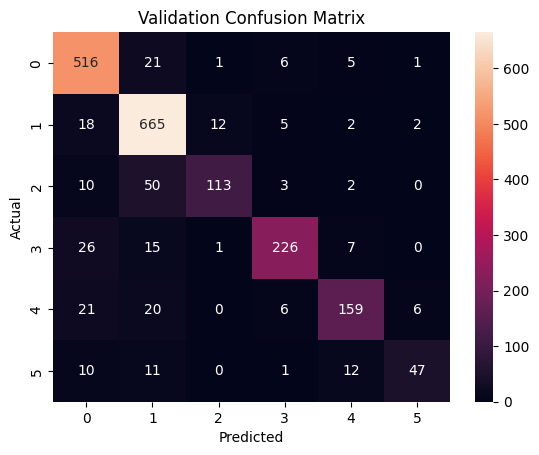

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       550
           1       0.85      0.94      0.90       704
           2       0.89      0.63      0.74       178
           3       0.91      0.82      0.87       275
           4       0.85      0.75      0.80       212
           5       0.84      0.58      0.69        81

    accuracy                           0.86      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.86      0.86      0.86      2000



In [30]:
# Validation predictions
val_pred = model.predict(X_val)

# Accuracy
print("Validation Accuracy:", accuracy_score(y_val, val_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, val_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_val, val_pred))

In [31]:
test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))


Test Accuracy: 0.869
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       581
           1       0.84      0.96      0.89       695
           2       0.83      0.60      0.69       159
           3       0.90      0.82      0.86       275
           4       0.89      0.79      0.84       224
           5       0.85      0.52      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



**predictive function**

In [34]:
label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

def predict_emotion(text):
    text_vec = vectorizer.transform([text])
    label_num = model.predict(text_vec)[0]
    return label_mapping[label_num]
print(predict_emotion("I am feeling really nervous today."))


fear
